In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd /content/drive/MyDrive/6180-Project

/content/drive/MyDrive/6180-Project


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

In [12]:
dataset = pd.read_csv('card_transdata.csv')

In [ ]:
dataset

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


**Cleaning of Dataset**

In [ ]:
print("Dataset shape",dataset.shape)

Dataset shape (1000000, 8)


To check for null values

In [ ]:
dataset.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

To check if negative values are present

In [ ]:
numerical_columns = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]

In [ ]:
for col in numerical_columns:
    if len(dataset[dataset[col] < 0]) == 0:
        print(col, "has no negative values.")
    else:
        print(col, "has negative values.")

distance_from_home has no negative values.
distance_from_last_transaction has no negative values.
ratio_to_median_purchase_price has no negative values.


**EDA**

In [ ]:
data = dataset.copy()

for cols in [0, 1, 2]:
    data.iloc[:, cols] = np.log10(data.iloc[:, cols])

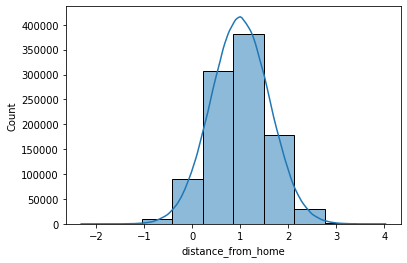

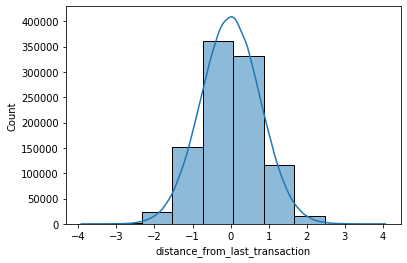

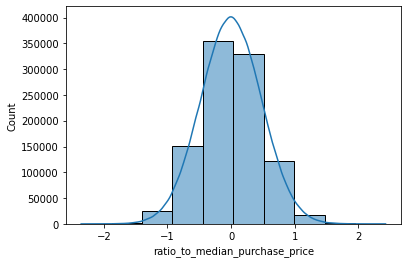

In [ ]:
for col in numerical_columns:
    plt.figure()
    plot = data[col]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

Number of fraud and non fraud transactions with fraud percent

In [ ]:
fraud_count = dataset[dataset["fraud"] == 1]["fraud"].count()
nonfraud_count = dataset[dataset["fraud"] == 0]["fraud"].count()
print("Number of fraud transactions:", fraud_count)
print("Number of non-fraud transactions:", nonfraud_count)
print("Fraud percent:", fraud_count / (fraud_count + nonfraud_count) * 100)

Number of fraud transactions: 87403
Number of non-fraud transactions: 912597
Fraud percent: 8.7403


Pie Chart for fraud and non fraud percentage 

In [ ]:
categories = ["Non-Fraud", "Fraud"]

([<matplotlib.patches.Wedge at 0x7fcb47678610>,
 [Text(-1.058791700494653, 0.29826185636725505, 'Non-Fraud'),
  Text(1.1550454914487123, -0.3253765705824602, 'Fraud')],
 [Text(-0.5775227457243561, 0.16268828529123003, '91.26%'),
  Text(0.6737765366784155, -0.1898029995064351, '8.74%')])

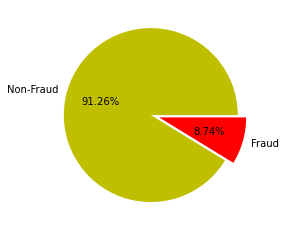

In [ ]:

plt.pie(dataset["fraud"].value_counts(), labels = categories, autopct = "%.2f%%", explode= (0, 0.1), colors = ("y", "r"))

In [ ]:
data_fraud = dataset[dataset["fraud"] == 1]

Text(0.5, 1.0, 'Was the retailer repeated?')

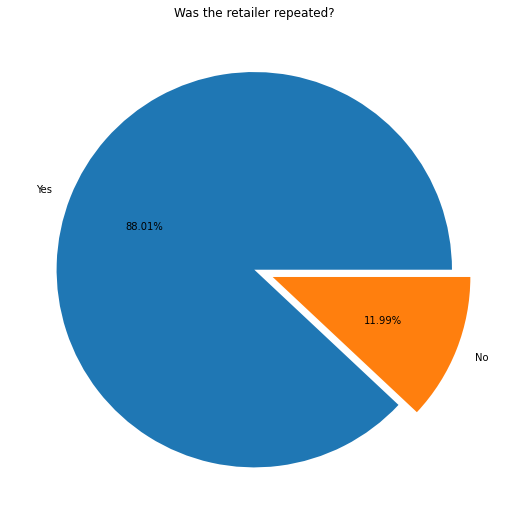

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
plt.pie(data_fraud["repeat_retailer"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the retailer repeated?")

Text(0.5, 1.0, 'Was the credit card chip used?')

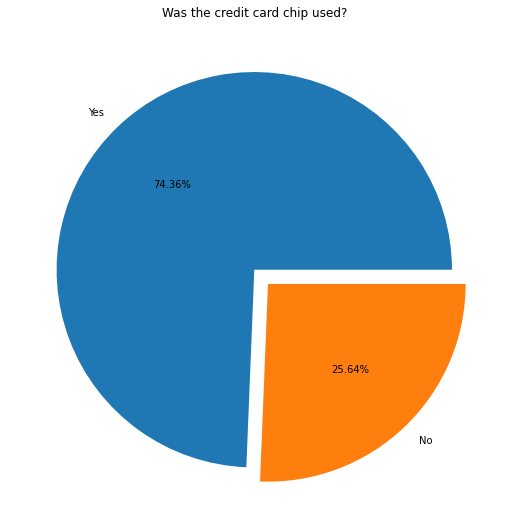

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.pie(data_fraud["used_chip"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the credit card chip used?")

Text(0.5, 1.0, 'Was the credit card pin number used?')

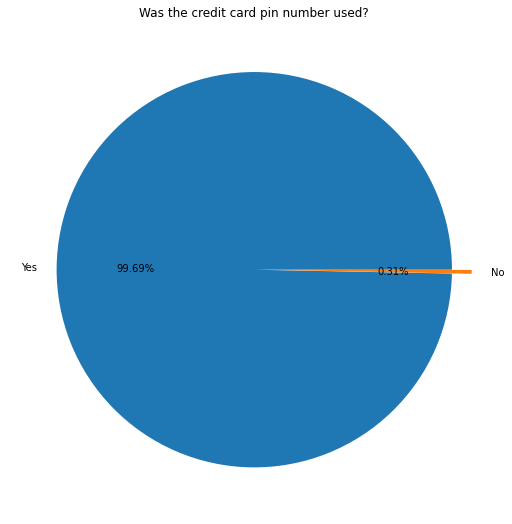

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,3)
plt.pie(data_fraud["used_pin_number"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the credit card pin number used?")

Text(0.5, 1.0, 'Was the transaction online?')

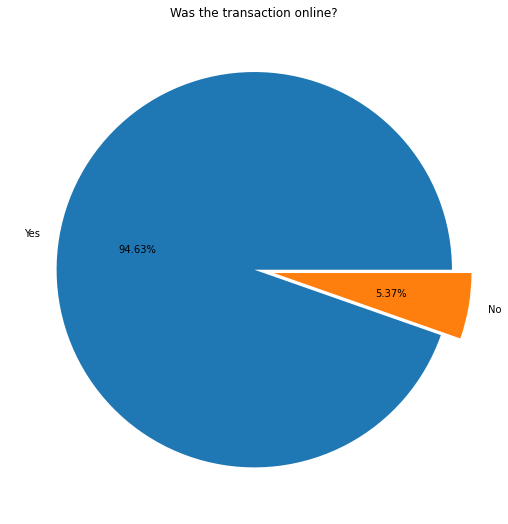

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,4)
plt.pie(data_fraud["online_order"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the transaction online?")

**Oversampling Technique (SMOTE)**

Splitting the features and target

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=39)
non_fraud_over, fraud_over = smote.fit_resample(x, y)

In [ ]:
non_fraud_over_df = pd.DataFrame(non_fraud_over, columns=["distance_from_home", "distance_from_last_transaction",
       "ratio_to_median_purchase_price", "repeat_retailer", "used_chip",
       "used_pin_number", "online_order"])
non_fraud_over_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.000000,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.000000,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.000000,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.000000,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.000000,0.0,1.0
...,...,...,...,...,...,...,...
1825189,0.865098,1.341068,4.173964,0.0,1.000000,0.0,1.0
1825190,4.803252,0.744443,6.650998,1.0,1.000000,0.0,1.0
1825191,12.536102,119.006991,4.094842,1.0,0.835731,0.0,1.0
1825192,389.245617,3.480952,0.922567,1.0,0.000000,0.0,1.0


In [ ]:
non_fraud_over_df["fraud"] = fraud_over
df3 = non_fraud_over_df

In [ ]:
print("df3 shape:", df3.shape)
print(df3.info())
df3.describe()

df3 shape: (1825194, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825194 entries, 0 to 1825193
Data columns (total 8 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   distance_from_home              float64
 1   distance_from_last_transaction  float64
 2   ratio_to_median_purchase_price  float64
 3   repeat_retailer                 float64
 4   used_chip                       float64
 5   used_pin_number                 float64
 6   online_order                    float64
 7   fraud                           float64
dtypes: float64(8)
memory usage: 111.4 MB
None


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1825194.0
mean,4.442516e+01,8.458492e+00,3.694127e+00,8.809996e-01,3.055032e-01,5.625144e-02,7.852103e-01,0.5
std,1.018351e+02,3.750252e+01,4.693421e+00,3.232951e-01,4.555445e-01,2.296677e-01,4.080603e-01,0.5
min,4.874385e-03,1.182816e-04,4.399240e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,4.142911e+00,3.112290e-01,6.944836e-01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
50%,1.173429e+01,1.050549e+00,1.993814e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.5
75%,3.774807e+01,3.800466e+00,5.212519e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.0
max,1.063272e+04,1.185110e+04,2.678029e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0


Correlation Analysis

In [ ]:
df3.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.017345,-0.083492,0.156579,-0.107274,-0.037222,0.060905,0.212031
distance_from_last_transaction,-0.017345,1.000000,-0.042851,-0.014638,-0.037251,-0.018364,0.024436,0.110849
ratio_to_median_purchase_price,-0.083492,-0.042851,1.000000,-0.040560,0.029782,-0.091203,0.143558,0.483759
repeat_retailer,0.156579,-0.014638,-0.040560,1.000000,-0.005939,0.001024,0.074406,-0.002079
used_chip,-0.107274,-0.037251,0.029782,-0.005939,1.000000,0.020375,-0.027219,-0.118317
used_pin_number,-0.037222,-0.018364,-0.091203,0.001024,0.020375,1.000000,-0.077735,-0.233786
online_order,0.060905,0.024436,0.143558,0.074406,-0.027219,-0.077735,1.000000,0.399414
fraud,0.212031,0.110849,0.483759,-0.002079,-0.118317,-0.233786,0.399414,1.000000


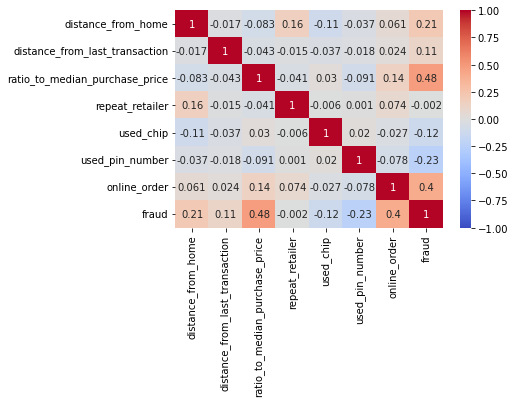

In [ ]:
sns.heatmap(df3.corr().round(3), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
sns.set(rc={"figure.figsize":(10,10)})
plt.show()

**Analyzing the dataset**

Splitting the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

feature_columns = ["distance_from_home", "distance_from_last_transaction",
"ratio_to_median_purchase_price", "repeat_retailer", "used_chip", "used_pin_number", "online_order"]

X_smote = df3[feature_columns]
y_smote = df3.fraud

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=39)

**ALGORITHMS**

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test_smote)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_smote, y_pred)
print(cm)
a1=accuracy_score(y_test_smote, y_pred)

[[178044   4635]
 [    25 182335]]


**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test_smote)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_smote, y_pred)
print(cm)
a2=accuracy_score(y_test_smote, y_pred)

[[182678      1]
 [     5 182355]]


**Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test_smote)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_smote, y_pred)
print(cm)
a3=accuracy_score(y_test_smote, y_pred)

[[182679      0]
 [     3 182357]]


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_smote, y_train_smote)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test_smote)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_smote, y_pred)
print(cm)
a4=accuracy_score(y_test_smote, y_pred)

[[111011  71668]
 [  6609 175751]]


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test_smote)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_smote, y_pred)
print(cm)
a5=accuracy_score(y_test_smote, y_pred)

[[170585  12094]
 [  9220 173140]]


**Plotting bar graph for all accuracies**

In [ ]:
# Create Data
x=['KNN','Decision Tree','Random Forest','Naive Bayes','Logistic Regression']
y=[a1*100,a2*100,a3*100,a4*100,a5*100]
y

[98.72342407249637,
 99.9983563400075,
 99.99917817000376,
 78.5565377945918,
 94.1611718199973]

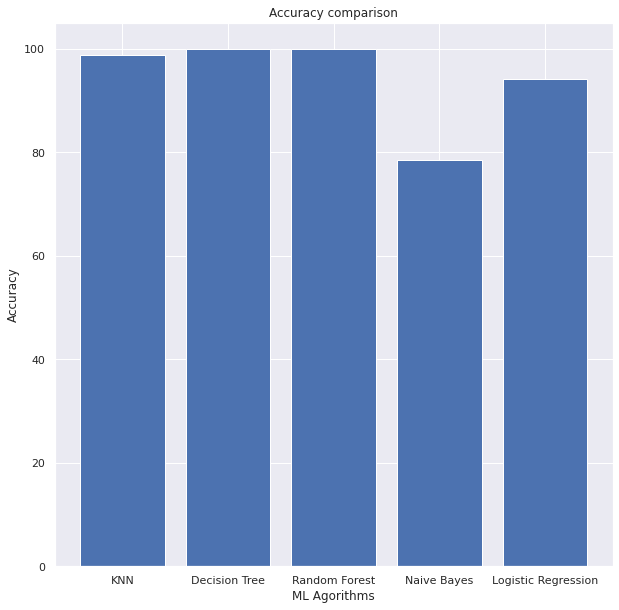

In [ ]:
plt.bar(x,y)
plt.xlabel('ML Agorithms')
plt.ylabel("Accuracy")
plt.title('Accuracy comparison')
plt.show()